In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
temperatures = pd.read_csv('data\Average annual temperature central England 1723  1970.csv')
temperatures = temperatures.set_index('temp').sort_index()
temperatures.index = temperatures.index.to_series().apply(lambda x: x + 1722)

In [3]:
temperatures.head()


,x
temp,
1723,9.77
1724,9.27
1725,8.66
1726,9.34
1727,9.94


In [4]:
temperatures.describe()

,x
count,248.000000
mean,9.216492
std,0.601082
min,6.840000
25%,8.840000
50%,9.220000
75%,9.610000
max,10.620000


Text(0, 0.5, 'Температура')

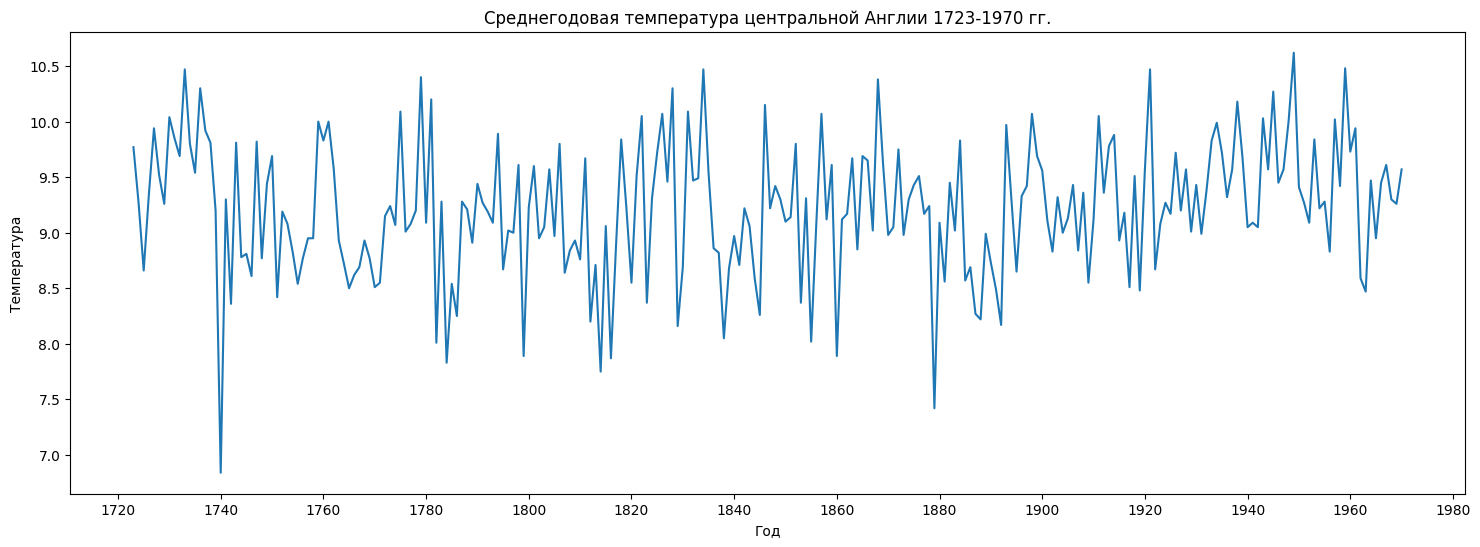

In [5]:
plt.figure(figsize=(18, 6))
plt.plot(temperatures)
plt.locator_params(axis='x', nbins=20)
plt.locator_params(axis='y', nbins=10)
plt.title("Среднегодовая температура центральной Англии 1723-1970 гг.")
plt.xlabel("Год")
plt.ylabel("Температура")

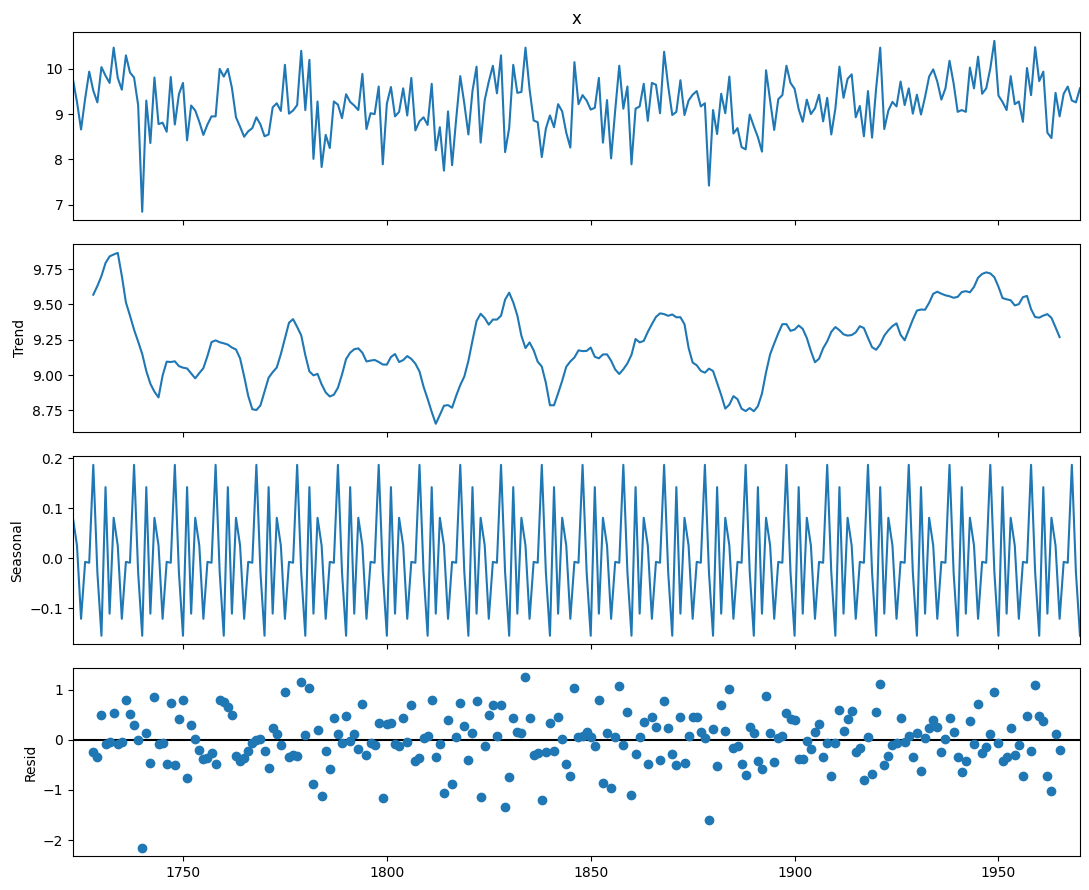

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(temperatures["x"], period=10)
decompose.plot()
plt.show()

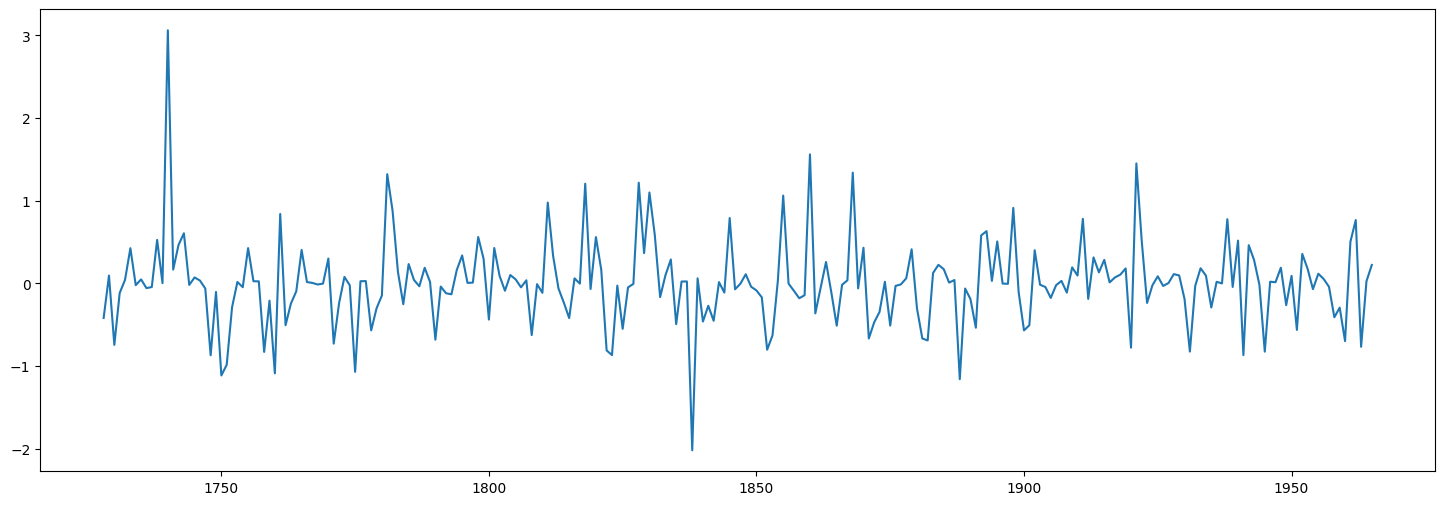

In [7]:
new_ps = decompose.trend * decompose.seasonal * decompose.resid

fig, axs = plt.subplots(figsize = (18, 6))

plt.plot(new_ps)
plt.show()


<Axes: xlabel='temp'>

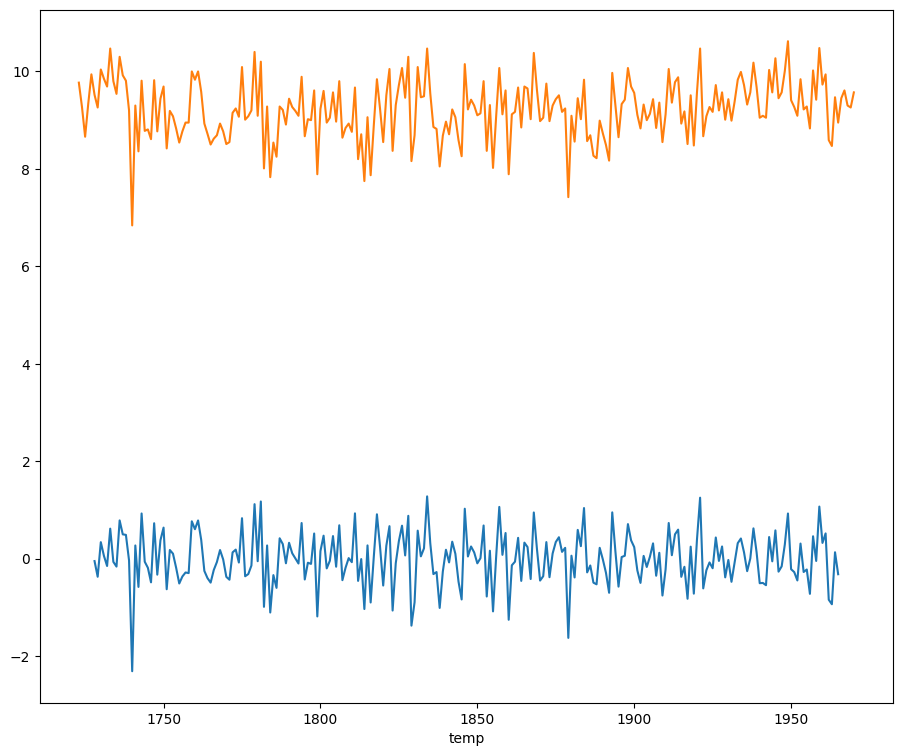

In [8]:
temperatures_r = temperatures["x"] - decompose.trend
temperatures_r.plot()
temperatures["x"].plot()

In [9]:
from statsmodels.tsa.stattools import adfuller

alpha = 0.05
name = "Температура"
ts = temperatures["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha * 100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Температура :
Test Statistic                -8.296696e+00
p-value                        4.121720e-13
#Lags Used                     1.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


C:\Users\pokum\AppData\Local\Temp\ipykernel_8068\1110318620.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


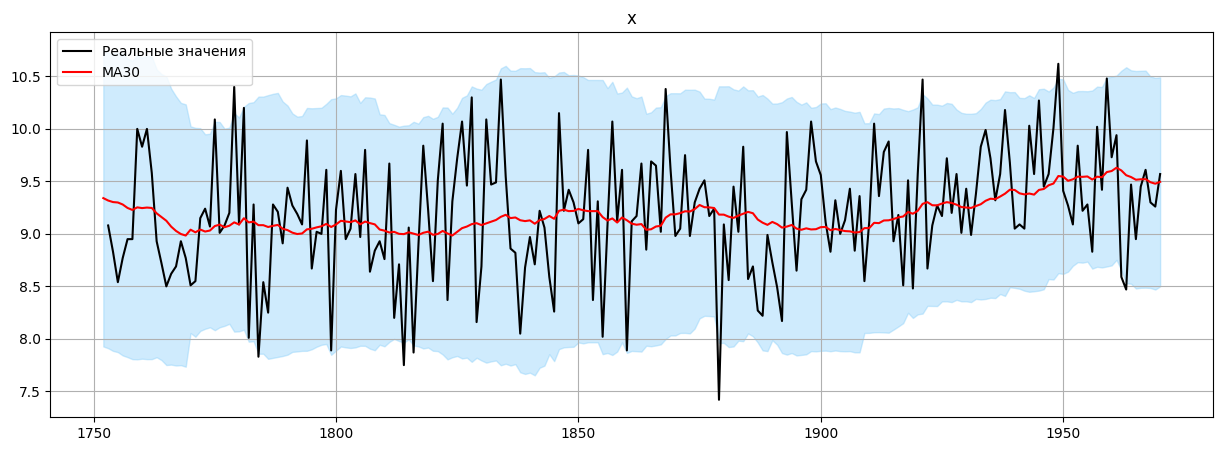

In [10]:
# указываем размер окна
window = 30

# вычисляем скользящее среднее и стандартное отклонение
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

# отрисовываем скользящее среднее
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")

# отрисовываем верхний и нижний интервалы
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
# показываем сетку на графике
plt.grid(True)
plt.show()

<Figure size 1200x700 with 0 Axes>

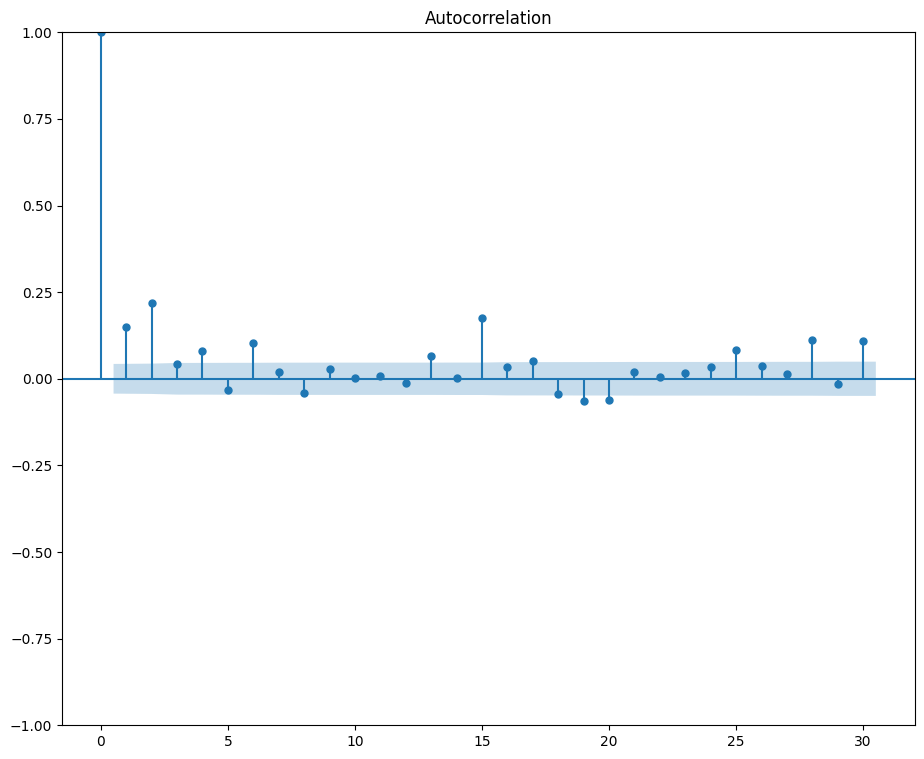

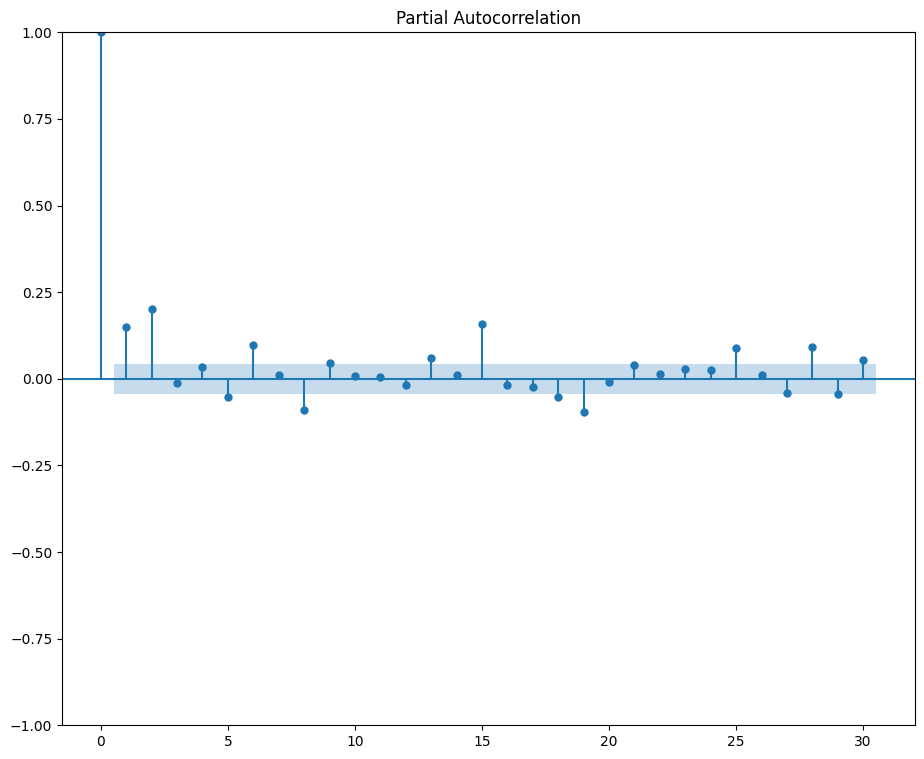

In [11]:
import statsmodels.tsa.api as smt
fig = plt.figure(figsize=(12, 7))
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)
pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

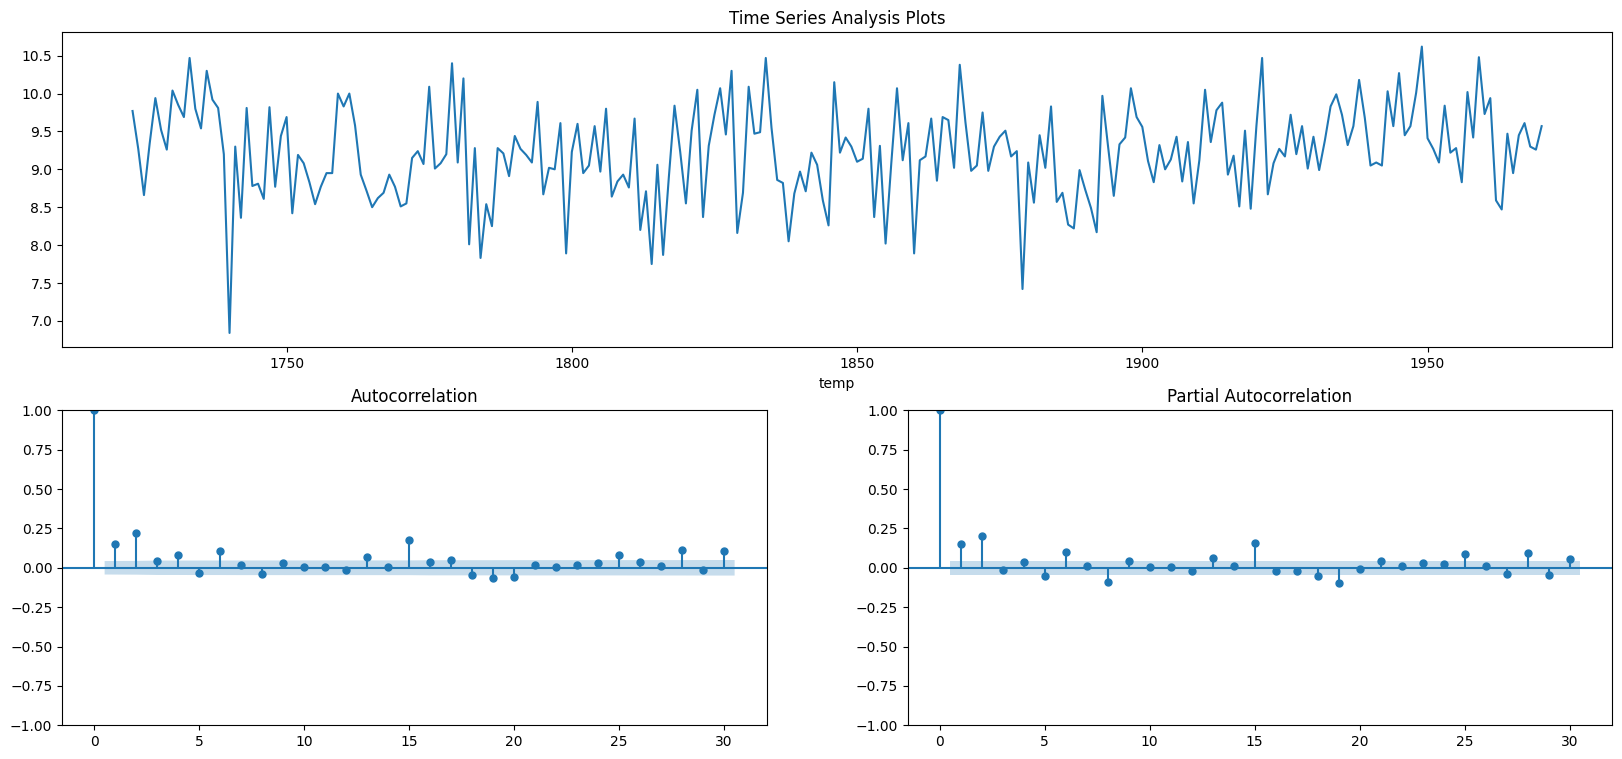

In [12]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None